<cite>Darryl Oatridge, August 2022<cite>

In [27]:
import os

In [28]:
os.environ['HADRON_PM_PATH'] = '../0_hello_meta/demo/contracts'
os.environ['HADRON_DEFAULT_PATH'] = '../0_hello_meta/demo/data'

## Feature Engineering

In [29]:
from ds_discovery import Wrangle, Transition, Commons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,4

In [31]:
wr = Wrangle.from_env('hello_wr')

In [32]:
df = wr.load_persist_canonical()

In [33]:
wr.canonical_report(df)

,Attributes (13),dType,%_Null,%_Dom,Count,Unique,Observations
0,age,float64,0.0%,3.6%,1309,361,max=80.0 | min=0.1667 | mean=29.91 | dominant=24.0
1,cabin,string,77.5%,77.5%,1309,187,Sample: C23 C25 C27 | G6 | B57 B59 B63 B66 | F4 | F33
2,deck,category,0.0%,77.5%,1309,9,Sample: | C | B | D | E
3,embarked,category,0.0%,69.8%,1309,4,Sample: S | C | Q | nan
4,family,category,0.0%,60.4%,1309,9,Sample: 0 | 1 | 2 | 3 | 5
5,fare,float64,0.0%,4.6%,1309,281,max=512.3292 | min=0.0 | mean=33.28 | dominant=8.05
6,is_alone,category,0.0%,60.4%,1309,2,Sample: 1 | 0
7,parch,category,0.0%,76.5%,1309,8,Sample: 0 | 1 | 2 | 3 | 4
8,pclass,category,0.0%,54.2%,1309,3,Sample: 3 | 1 | 2
9,sex,category,0.0%,64.4%,1309,2,Sample: male | female


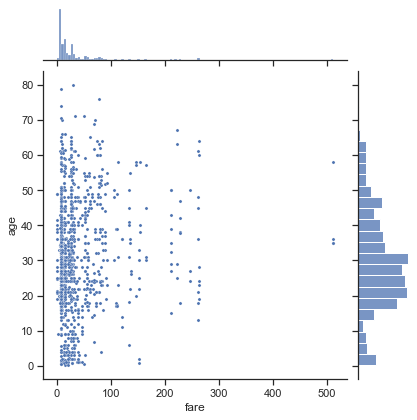

In [34]:
# Age against Fare
sns.set(style="ticks", color_codes=True)
g = sns.jointplot(x='fare',y='age',data=df, s=10)

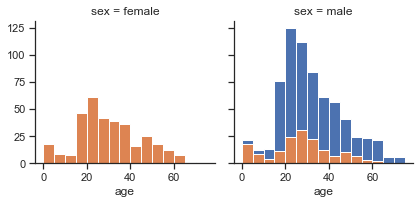

In [35]:
# Age Gender distribution of survived as a hue
sns.set(style="ticks", color_codes=True)
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(data=df, col='sex', hue='survived')
g.map(plt.hist, 'age', bins=bins)
plt.show(g)

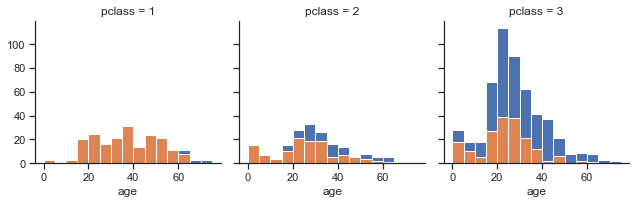

In [36]:
# Age against class with the hue of survived
sns.set(style="ticks", color_codes=True)
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(data=df, col='pclass', hue='survived')
g.map(plt.hist, 'age', bins=bins)
plt.show(g)

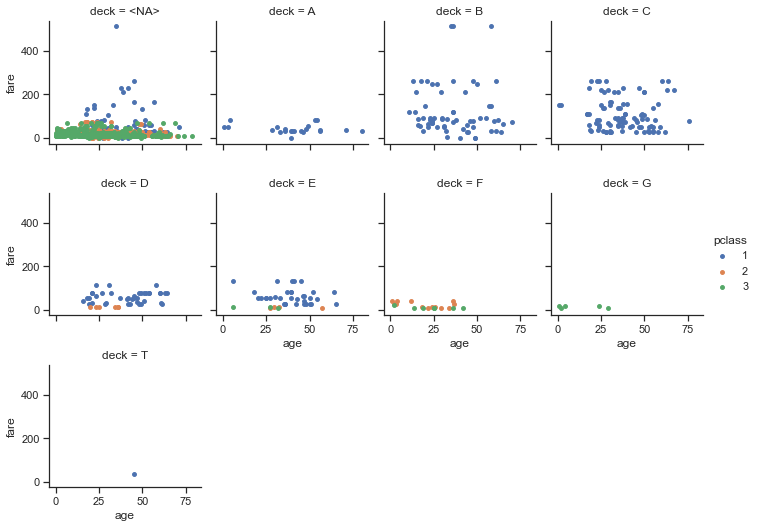

In [37]:
# Age against fair across the decks with a hueof class
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(data=df, col='deck', hue='pclass', col_wrap=4, height=2.5)
g = g.map(plt.scatter, 'age', 'fare', s=15).add_legend()
g.fig.subplots_adjust(wspace=0.1, hspace=0.4)
plt.show(g)

## Analysis

In [68]:
# saves you having to use print as all exposed variables are printed in the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# suppress warning message
import warnings
warnings.filterwarnings('ignore')

from ds_discovery.components.discovery import DataDiscovery



In [78]:
blob = wr.discover.analyse_association(df, columns_list=[{'survived' :{}, 'pclass' :{}, 'sex' :{}, 'fare' :{}, 'age' :{'granularity':5.0}}])

In [77]:
blob

{'survived': {'branch': {'label': 'survived',
   'root': 'survived',
   'leaves': ['0', '1']},
  'insight': {'intent': {'categories': [0, 1], 'dtype': 'category'},
   'params': {'freq_precision': 2},
   'patterns': {'relative_freq': [61.8, 38.2],
    'sample_distribution': [809, 500]},
   'stats': {'category_count': 2,
    'highest_unique': 61.8,
    'lowest_unique': 38.2,
    'nulls_percent': 0.0,
    'sample_size': 1309,
    'excluded_percent': 0.0}}},
 'pclass': {'branch': {'label': 'pclass',
   'root': 'pclass',
   'leaves': ['3', '1', '2']},
  'insight': {'intent': {'categories': [3, 1, 2], 'dtype': 'category'},
   'params': {'freq_precision': 2},
   'patterns': {'relative_freq': [54.16, 24.68, 21.16],
    'sample_distribution': [709, 323, 277]},
   'stats': {'category_count': 3,
    'highest_unique': 54.16,
    'lowest_unique': 21.16,
    'nulls_percent': 0.0,
    'sample_size': 1309,
    'excluded_percent': 0.0}}},
 'sex': {'branch': {'label': 'sex',
   'root': 'sex',
   'leaves

In [74]:
df['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [39]:
df2 = wr.tools.model_analysis(1300,other='primary_persist', columns_list=['survived', 'pclass', 'sex', 'age'], column_name='analysis')

In [40]:
df.shape
df2.shape

(1309, 13)

(1300, 4)

In [41]:
df.sex.value_counts().to_list()
df2.sex.value_counts().to_list()

[843, 466]

[833, 467]

In [42]:
df.pclass.value_counts().to_list()
df2.pclass.value_counts().to_list()

[709, 323, 277]

[695, 324, 281]

In [53]:
sel = [{'age': {}},
       {'survived': {}, 'pclass': {}, 'sex': {}}]
df3 = wr.tools.model_analysis(1300,other='primary_persist', columns_list=sel, column_name='analysis')

In [54]:
df.sex.value_counts().to_list()
df3.sex.value_counts().to_list()

[843, 466]

[860, 440]

In [55]:
df.pclass.value_counts().to_list()
df3.pclass.value_counts().to_list()

[709, 323, 277]

[702, 321, 277]

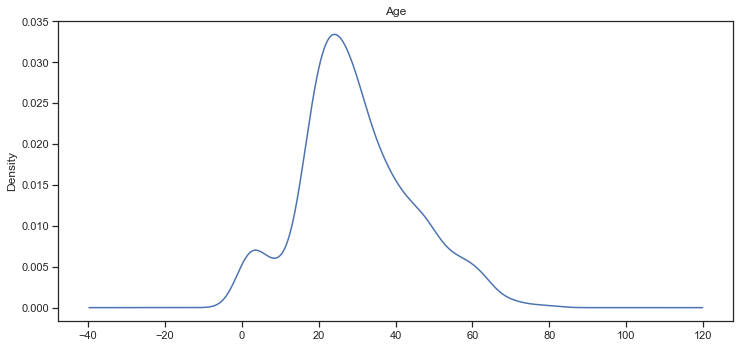

<Figure size 864x288 with 0 Axes>

In [65]:
wr.visual.show_num_density(Commons.filter_columns(df, headers=['age']))

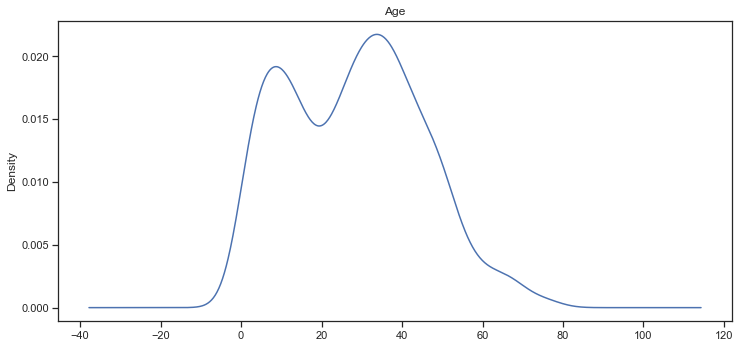

<Figure size 864x288 with 0 Axes>

In [67]:
wr.visual.show_num_density(Commons.filter_columns(df2, headers=['age']))

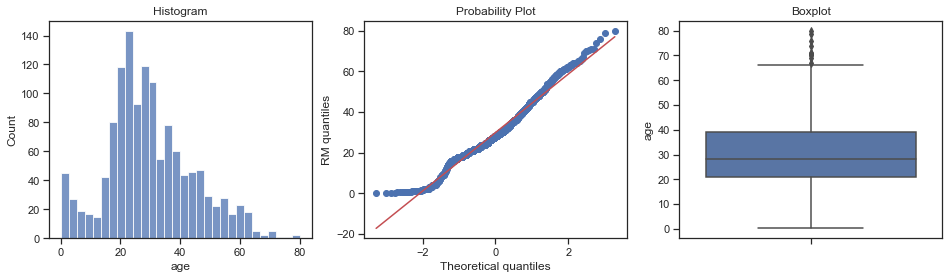

<Figure size 864x288 with 0 Axes>

In [43]:
wr.visual.show_distribution(df, header='age')

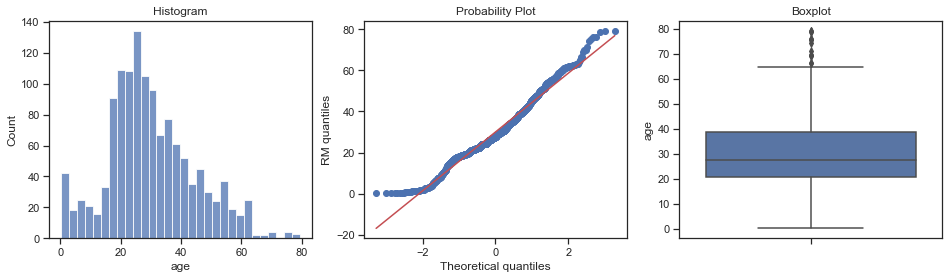

<Figure size 864x288 with 0 Axes>

In [44]:
wr.visual.show_distribution(df2, header='age')

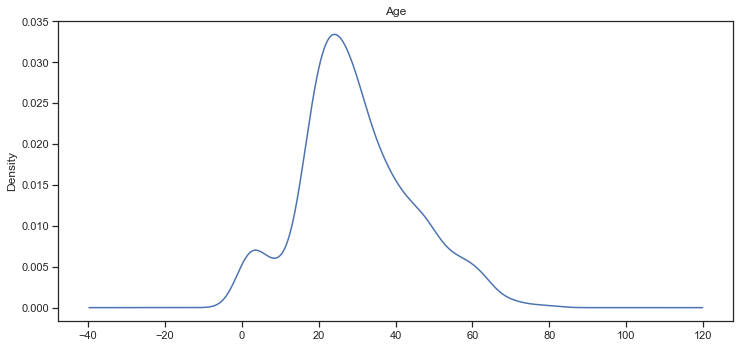

<Figure size 864x288 with 0 Axes>

In [45]:
wr.visual.show_num_density(Commons.filter_columns(df, headers=['age']))

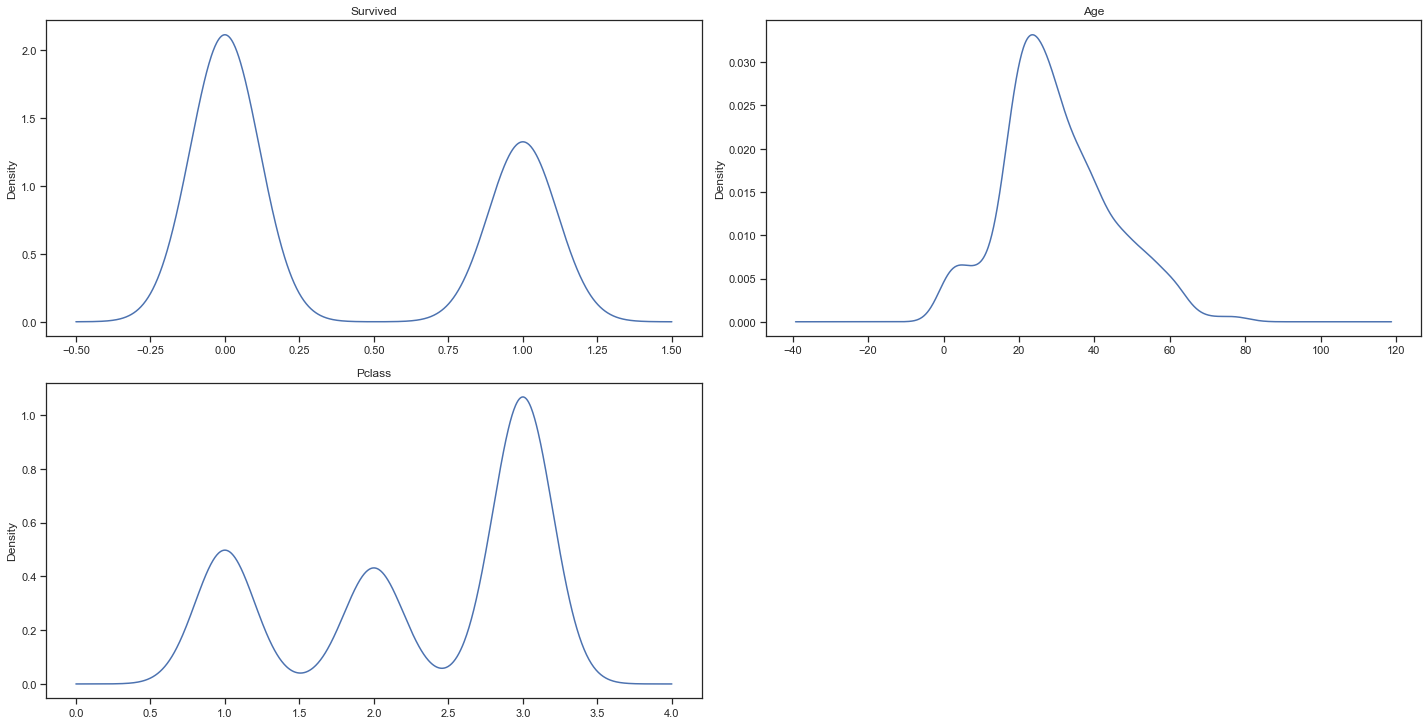

<Figure size 864x288 with 0 Axes>

In [46]:
wr.visual.show_num_density(df2)

In [47]:
sel = [{'survived': {}}, 
       {'pclass': {}},
       {'age': {}}
      ]
df2 = wr.tools.model_analysis(1300, other='primary_persist',strict_typing=True , columns_list=sel, column_name='analysis')

In [48]:
wr.canonical_report(df2)

,Attributes (2),dType,%_Null,%_Dom,Count,Unique,Observations
0,age,float64,0.0%,0.2%,1300,1283,"max=76.283 | min=0.235 | mean=28.08 | dominant=[1.667, 2.845]"
1,pclass,int64,0.0%,54.8%,1300,3,max=3 | min=1 | mean=2.31 | dominant=3


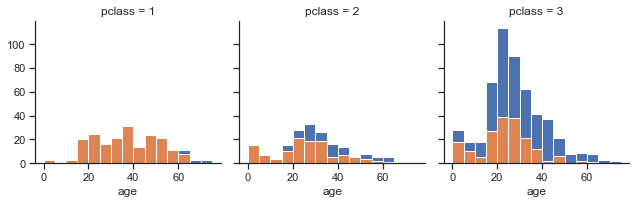

In [50]:
# Age against class with the hue of survived
sns.set(style="ticks", color_codes=True)
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(data=df, col='pclass', hue='survived')
g.map(plt.hist, 'age', bins=bins)
plt.show(g)

In [51]:
# Age against class with the hue of survived
sns.set(style="ticks", color_codes=True)
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(data=df2, col='pclass', hue='survived')
g.map(plt.hist, 'age', bins=bins)
plt.show(g)

KeyError: 'survived'